### Creating a DataFrame from the CSV files

In [1]:
import pandas as pd 
import glob 
import os

In [2]:
# Find CSV files in data directory
csv_files = glob.glob(os.path.join("data", "*.csv"))

In [3]:
# Read each CSV into a Pandas DataFrame
df_all = [pd.read_csv(file) for file in csv_files]

In [4]:
# Concatenate DataFrames
df = pd.concat(df_all, ignore_index=True)

### Cleaning the DataFrame

In [5]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,tail_number,departure_delay,arrival_delay,delay_carrier,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,2019-07-01,215,N611AS,0,-16,0,...,0.0,29.60,10.0,6.0,7.027253e+10,57.0,0.0,30.04,10.0,3.0
1,B6,1092,BQN,FLL,2019-07-01,155,N589JB,-19,-40,0,...,NaN,29.81,10.0,9.0,7.478301e+10,78.0,0.0,30.01,10.0,0.0
2,B6,668,PSE,MCO,2019-07-01,175,N662JB,73,69,0,...,NaN,NaN,NaN,NaN,7.220501e+10,76.0,0.0,29.93,10.0,3.0
3,F9,402,LAX,DEN,2019-07-01,143,N706FR,-1,-7,0,...,0.0,29.60,10.0,6.0,7.256500e+10,62.0,0.0,24.69,10.0,8.0
4,F9,790,PDX,DEN,2019-07-01,156,N350FR,21,10,0,...,0.0,29.92,10.0,6.0,7.256500e+10,62.0,0.0,24.70,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512898,DL,3526,ATL,MGM,2019-05-31,59,N8923A,-1,-18,0,...,0.0,28.84,10.0,7.0,7.222601e+10,74.0,0.0,29.67,10.0,6.0
5512899,DL,508,ATL,BHM,2019-05-31,55,N978DL,-3,-6,0,...,0.0,28.84,10.0,7.0,7.222801e+10,74.0,0.0,29.26,10.0,0.0
5512900,DL,1075,ATL,HSV,2019-05-31,57,N952AT,31,18,18,...,0.0,28.84,10.0,8.0,7.232300e+10,71.0,0.0,29.20,10.0,3.0
5512901,DL,2436,ATL,BHM,2019-05-31,56,N916DL,28,13,0,...,0.0,28.84,10.0,8.0,7.222801e+10,67.0,0.0,29.24,10.0,0.0


In [7]:
# Percentage rows with any NaN values across all columns
round((len(df[df.isna().any(axis=1)]) / len(df)) * 100,2)

1.96

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

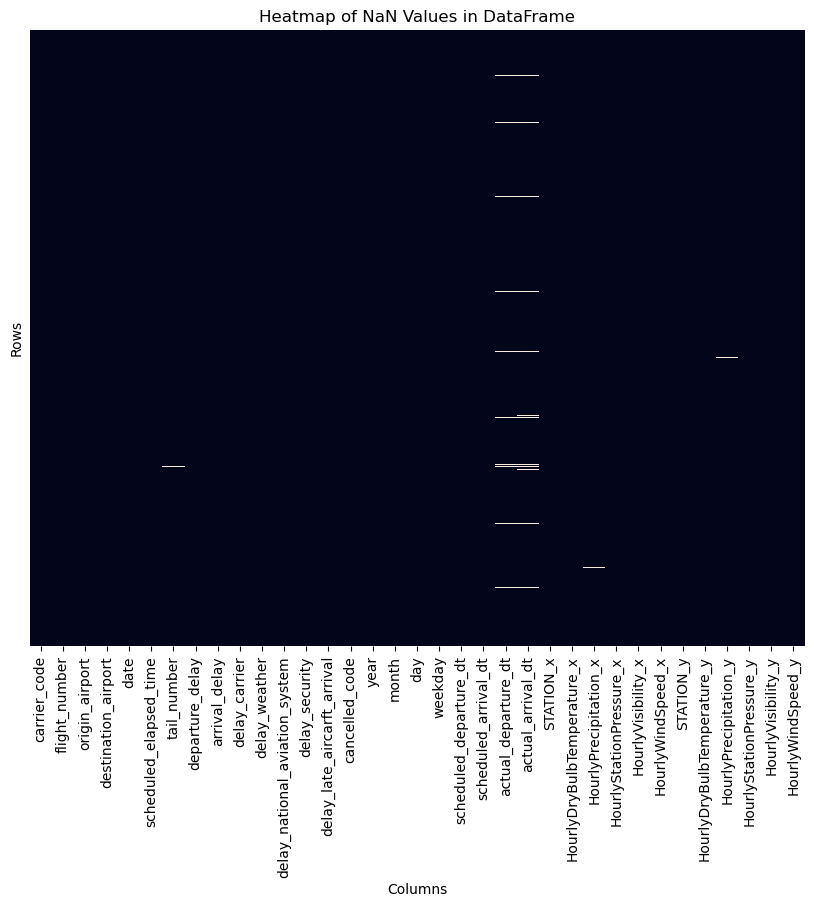

In [9]:
# Creating heatmap all NaN values in DataFrame
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)

plt.title('Heatmap of NaN Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.show()